<a href="https://colab.research.google.com/github/satoshibasaki/competition/blob/main/signate_46th_beginner_v2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 【第46回_Beginner限定コンペ】携帯電話の機能データからの価格帯分類


携帯電話の機能から販売価格を分類しよう！

## データの読み込み

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

dir = "/content/drive/MyDrive/Data/signate_46th_begginer"
df_train_all = pd.read_csv(dir + '/train.csv')
df_test = pd.read_csv(dir + '/test.csv')
df_test_id = df_test["id"]
sample_submission = pd.read_csv(dir + '/sample_submission.csv')

テストデータセットとサンプルファイルのデータ数が合わない。

id=1 がサンプルには無いのが原因。

## データ分析

In [ ]:
display(df_train_all.head())
display(df_test.head())

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0,1203,0,0.680981,1,1,1,23,0.402580,117,...,1331,721,1970,15,1,4,1,0,1,2
1,3,1203,1,2.602754,1,0,0,8,0.415612,194,...,1571,1262,1150,14,16,14,1,0,1,3
2,4,1980,1,2.604065,1,0,0,6,0.858110,122,...,364,721,1970,18,12,11,1,0,1,1
3,5,1185,1,2.669403,1,3,0,33,0.027065,132,...,447,1162,1950,15,3,19,1,0,0,2
4,7,1203,1,2.375453,0,4,1,12,0.141485,135,...,364,1917,1970,16,7,6,1,1,1,0


,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1203,0,0.498993,1,0,1,40,0.914530,190,...,7,381,721,1970,6,1,2,1,0,1
1,2,1154,0,1.981014,0,1,0,33,0.025999,82,...,10,376,1555,1970,11,7,3,1,0,0
2,6,1027,1,1.647026,0,0,1,32,0.912318,103,...,1,364,1374,1970,17,1,6,1,0,0
3,10,833,0,1.070061,0,0,0,2,0.033010,156,...,0,1331,1710,832,12,8,8,1,1,0
4,12,1027,1,1.859165,0,4,1,2,0.612349,171,...,13,667,1642,2655,14,5,2,1,1,0


In [ ]:
display(df_train_all.head())
display(df_test.head())

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1203,0,0.680981,1,1,1,23,0.402580,117,3,...,1331,721,1970,15,1,4,1,0,1,2
1,1203,1,2.602754,1,0,0,8,0.415612,194,1,...,1571,1262,1150,14,16,14,1,0,1,3
2,1980,1,2.604065,1,0,0,6,0.858110,122,2,...,364,721,1970,18,12,11,1,0,1,1
3,1185,1,2.669403,1,3,0,33,0.027065,132,8,...,447,1162,1950,15,3,19,1,0,0,2
4,1203,1,2.375453,0,4,1,12,0.141485,135,6,...,364,1917,1970,16,7,6,1,1,1,0


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1203,0,0.498993,1,0,1,40,0.914530,190,8,7,381,721,1970,6,1,2,1,0,1
1,1154,0,1.981014,0,1,0,33,0.025999,82,6,10,376,1555,1970,11,7,3,1,0,0
2,1027,1,1.647026,0,0,1,32,0.912318,103,6,1,364,1374,1970,17,1,6,1,0,0
3,833,0,1.070061,0,0,0,2,0.033010,156,7,0,1331,1710,832,12,8,8,1,1,0
4,1027,1,1.859165,0,4,1,2,0.612349,171,1,13,667,1642,2655,14,5,2,1,1,0


In [ ]:
# データのシェイプ
print('train data:', df_train_all.shape, 'test data:', df_test.shape)

train data: (1200, 21) test data: (800, 20)


In [ ]:
# データタイプの表示
print('train data:')
print(df_train_all.info(), '\n')
print('test data:')
print(df_test.info(), '\n')

train data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1200 non-null   int64  
 1   blue           1200 non-null   int64  
 2   clock_speed    1200 non-null   float64
 3   dual_sim       1200 non-null   int64  
 4   fc             1200 non-null   int64  
 5   four_g         1200 non-null   int64  
 6   int_memory     1200 non-null   int64  
 7   m_dep          1200 non-null   float64
 8   mobile_wt      1200 non-null   int64  
 9   n_cores        1200 non-null   int64  
 10  pc             1200 non-null   int64  
 11  px_height      1200 non-null   int64  
 12  px_width       1200 non-null   int64  
 13  ram            1200 non-null   int64  
 14  sc_h           1200 non-null   int64  
 15  sc_w           1200 non-null   int64  
 16  talk_time      1200 non-null   int64  
 17  three_g        1200 non-null   int64  
 

訓練・テストデータセットすべてのデータポイントに欠損値がない

In [ ]:
# データの詳細情報
print('train data:')
print(df_train_all.describe(), '\n')
print('test data:')
print(df_test.describe(), '\n')

train data:
       battery_power         blue  clock_speed     dual_sim           fc  \
count    1200.000000  1200.000000  1200.000000  1200.000000  1200.000000   
mean     1208.958333     0.408333     1.231201     0.565833     1.452500   
std       421.707099     0.491730     0.786728     0.495854     2.590045   
min       518.000000     0.000000     0.466459     0.000000     0.000000   
25%       916.000000     0.000000     0.498935     0.000000     0.000000   
50%      1203.000000     0.000000     1.086733     1.000000     0.000000   
75%      1537.000000     1.000000     1.864943     1.000000     2.000000   
max      1991.000000     1.000000     2.730560     1.000000    16.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  1200.000000  1200.000000  1200.000000  1200.000000  1200.000000  ...   
mean      0.625833    29.747500     0.374023   137.475833     3.815000  ...   
std       0.484109    17.514071     0.322579    34.706169     2.45

スケールがまちまちだから、標準化が必要

In [ ]:
df_train_all['price_range'].value_counts()

price_range
2    420
1    300
3    268
0    212
Name: count, dtype: int64

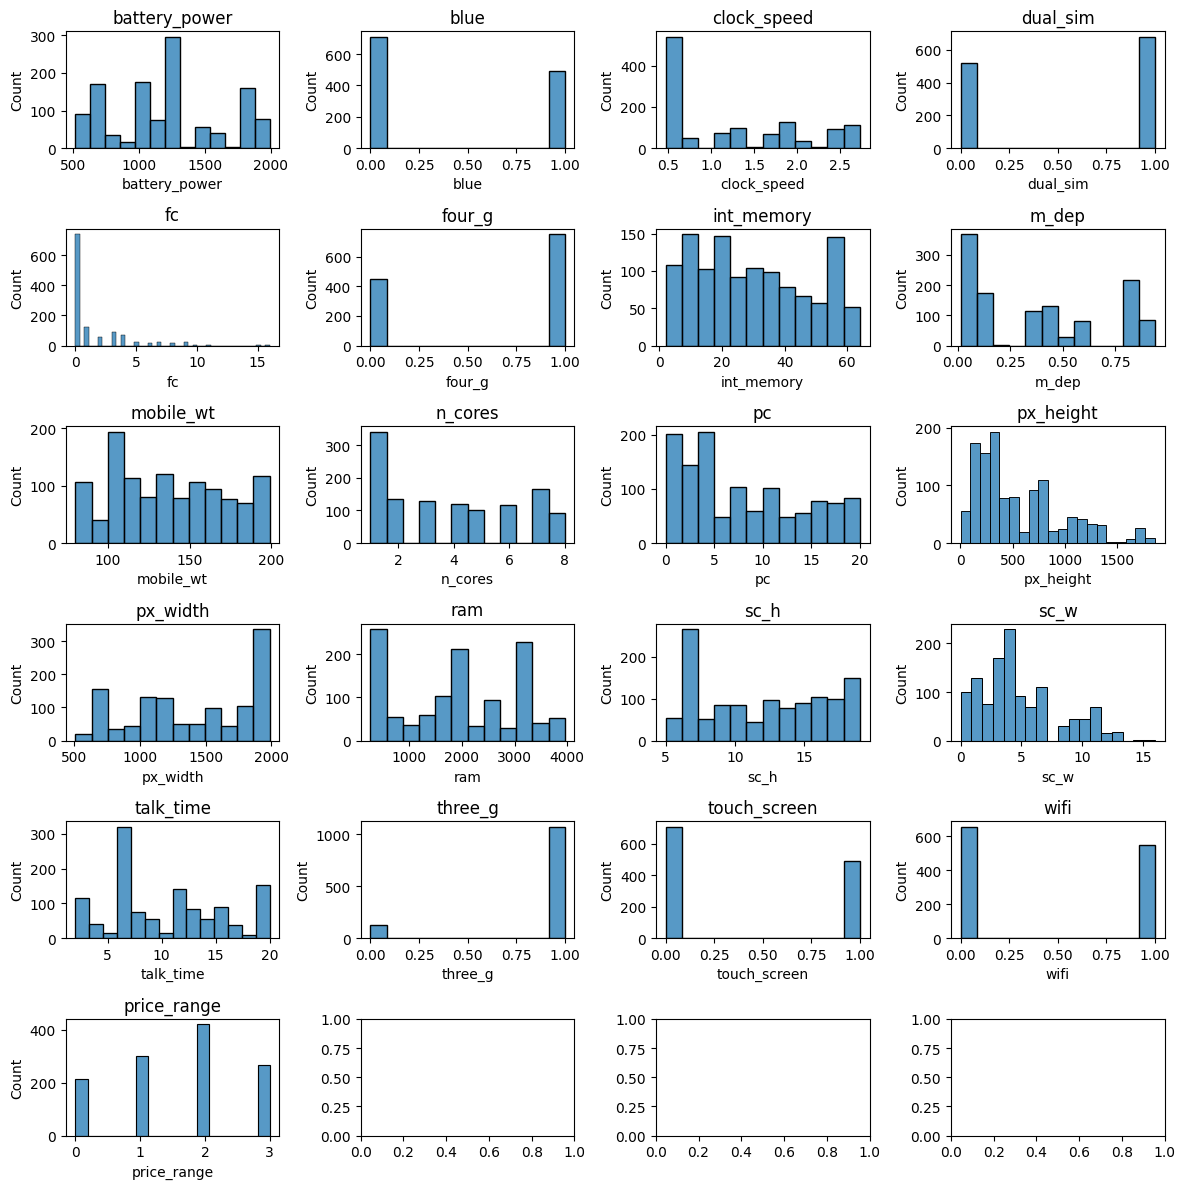

In [ ]:
# 特徴量ごとのヒストグラムを表示

import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(12, 12))
for i, ax in enumerate(axes.flat):
  if i < len(df_train_all.columns):
    sns.histplot(data=df_train_all, x=df_train_all.columns[i], ax=ax)
    ax.set_title(df_train_all.columns[i])
plt.tight_layout()
plt.show()


In [ ]:
print(df_train_all["n_cores"].value_counts())
print(df_train_all["fc"].value_counts())

n_cores
1    341
7    167
2    136
3    128
4    119
6    118
5    100
8     91
Name: count, dtype: int64
fc
0     737
1     123
3      92
4      69
2      56
9      26
5      25
7      22
8      19
6      17
16      7
10      4
11      2
15      1
Name: count, dtype: int64


n_cores, fc ともに数値が大きいほど性能が良いから、カテゴリ変数ではなく順序変数として扱った方が自然かもしれない

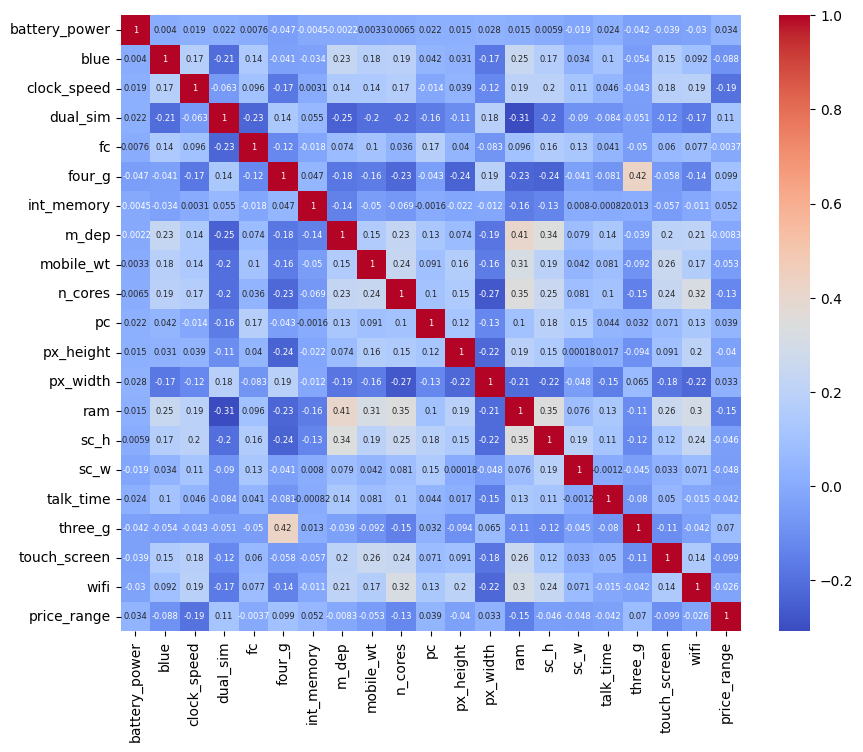

In [ ]:
# 特徴量同士の相関関係を表示

corr = df_train_all.corr()
plt.figure(figsize=(10, 8))  # サイズを大きく設定
sns.heatmap(corr, annot=True, annot_kws={"size":6}, cmap='coolwarm')
plt.show()

## データの前処理

In [ ]:
# id は不要なので落とす
df_train_all = df_train_all.drop('id', axis=1)
df_test = df_test.drop('id', axis=1)

# ターゲット変数 y は分けておく
y = df_train_all["price_range"]
X = df_train_all.drop("price_range", axis=1)  # ここから特徴量は X, df_test に対して作成・追加する

### 新しい特徴量の作成・追加

In [ ]:
# スクリーン面積: sc_area
X["sc_area"] = np.multiply(X["sc_h"], X["sc_w"])
df_test["sc_area"] = np.multiply(df_test["sc_h"], df_test["sc_w"])

# 画面比率: sc_ratio => NG (inf)
# X["sc_ratio"] = np.divide(X["sc_h"], X["sc_w"])
# df_test["sc_ratio"] = np.divide(df_test["sc_h"], df_test["sc_w"])

# 連続通信時間比: talk_time_ratio
# X["talk_time_ratio"] = X["talk_time"] / X["battery_power"]
# df_test["talk_time_ratio"] = df_test["talk_time"] / df_test["battery_power"]

# ピクセル密度: px_density => 値が大きすぎてNG (inf)
# X["px_density"] = np.divide(np.multiply(X["px_height"], X["px_width"]), X["sc_area"])
# df_test["px_density"] = np.divide(np.multiply(df_test["px_height"], df_test["px_width"]), df_test["sc_area"])

# プロセッサ速度指数: ps_idx
X["ps_idx"] = np.multiply(X["clock_speed"], X["n_cores"])
df_test["ps_idx"] = np.multiply(df_test["clock_speed"], df_test["n_cores"])

# コア当たりのRAM: ram_per_core
# X["ram_per_core"] = np.divide(X["ram"], X["n_cores"])
# df_test["ram_per_core"] = np.divide(df_test["ram"], df_test["n_cores"])

# メモリ効率: mem_eff
# X["mem_eff"] = np.divide(X["ram"], X["mobile_wt"])
# df_test["mem_eff"] = np.divide(df_test["ram"], df_test["mobile_wt"])

# ストレージ効率: str_eff
# X["str_eff"] = np.divide(X["int_memory"], X["mobile_wt"])
# df_test["str_eff"] = np.divide(df_test["int_memory"], df_test["mobile_wt"])

# バッテリー密度: bp_wt
# X["bp_wt"] = np.divide(X["battery_power"], X["mobile_wt"])
# df_test["bp_wt"] = np.divide(df_test["battery_power"], df_test["mobile_wt"])

# カメラ品質指数: cq_idx
X["cq_idx"] = X["pc"] + X["fc"]
df_test["cq_idx"] = df_test["pc"] + df_test["fc"]

# 通信機能数: conn_ft_cnt
X["conn_ft_cnt"] = X["blue"] + X["four_g"] + X["three_g"] + X["wifi"]
df_test["conn_ft_cnt"] = df_test["blue"] + df_test["four_g"] + df_test["three_g"] + df_test["wifi"]

# 全体の機能数: all_ft_cnt
X["all_ft_cnt"] = X["blue"] + X["dual_sim"]+ X["touch_screen"] + X["four_g"] + X["three_g"] + X["wifi"]
df_test["all_ft_cnt"] = df_test["blue"]+ df_test["dual_sim"]+ df_test["touch_screen"] + df_test["four_g"] + df_test["three_g"] + df_test["wifi"]

In [ ]:
X['mem_eff'].describe()

count    1200.000000
mean       14.186320
std         9.025227
min         1.444444
25%         5.927835
50%        13.822485
75%        20.425120
max        44.000000
Name: mem_eff, dtype: float64

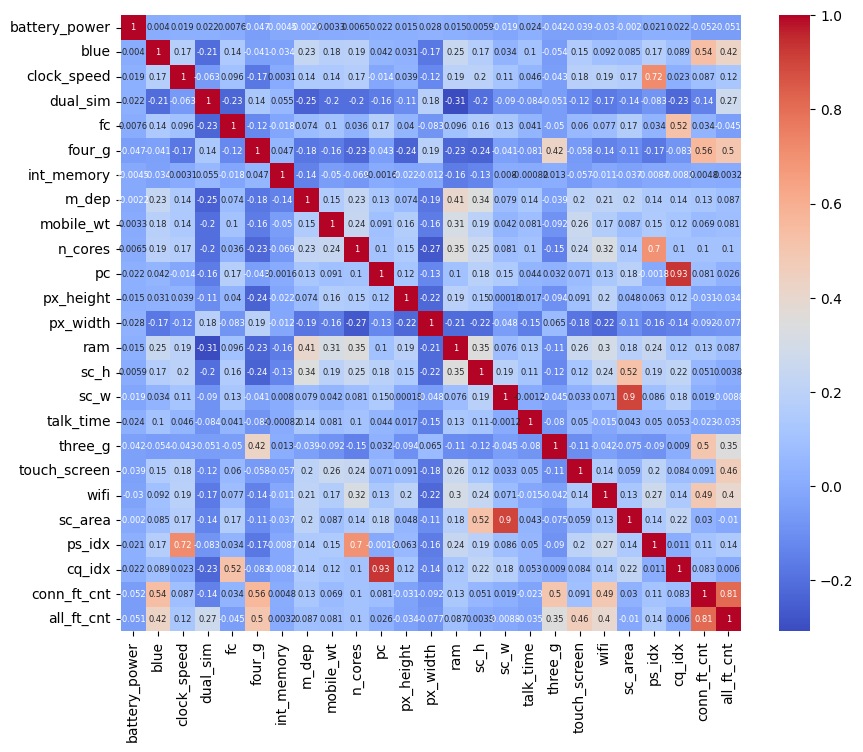

In [ ]:
# 特徴量同士の相関関係を表示
import matplotlib.pyplot as plt
import seaborn as sns

corr = X.corr()
plt.figure(figsize=(10, 8))  # サイズを大きく設定
sns.heatmap(corr, annot=True, annot_kws={"size":6}, cmap='coolwarm')
plt.show()

### train データセットを訓練・検証データに分割

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### 特徴量の尺度を揃える

カテゴリ変数は無いようなので、0/1 以外の特徴量は標準化をする

In [ ]:
X.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'sc_area', 'ps_idx', 'cq_idx', 'conn_ft_cnt',
       'all_ft_cnt'],
      dtype='object')

In [ ]:
df_test.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'sc_area', 'talk_time_ratio', 'ps_idx',
       'cq_idx', 'conn_ft_cnt', 'all_ft_cnt', 'sc_ratio'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler

# std_columns = ['battery_power', 'clock_speed', 'fc',
#        'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
#        'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'sc_area',
#        'ps_idx', 'ram_per_core', 'mem_eff', 'str_eff', 'bp_wt', 'cq_idx', 'conn_ft_cnt', 'all_ft_cnt']

std_columns = ['battery_power', 'clock_speed', 'fc',
        'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
        'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'sc_area',
        'ps_idx', 'cq_idx', 'conn_ft_cnt', 'all_ft_cnt',
        ]

# Standardize training data
sc = StandardScaler().fit(X_train[std_columns])
X_train[std_columns] = sc.transform(X_train[std_columns])

# Standardize validation data
X_valid[std_columns] = sc.transform(X_valid[std_columns])

# Standardize test data
df_test[std_columns] = sc.transform(df_test[std_columns])

In [ ]:
# 確認用コード
print('\ntrain: \n', X_train[std_columns].mean(axis=0))
print(X_train[std_columns].std(axis=0))

print('\nvalid: \n', X_valid[std_columns].mean(axis=0))
print(X_valid[std_columns].std(axis=0))

print('\ntest: \n', df_test[std_columns].mean(axis=0))
print(df_test[std_columns].std(axis=0))


train: 
 battery_power      1.239749e-16
clock_speed        2.942091e-16
fc                -2.590520e-17
int_memory         0.000000e+00
m_dep              1.170360e-16
mobile_wt         -4.810966e-17
n_cores           -2.220446e-17
pc                 1.665335e-17
px_height         -5.736152e-17
px_width          -3.700743e-17
ram                4.625929e-17
sc_h               1.813364e-16
sc_w               0.000000e+00
talk_time         -1.036208e-16
sc_area           -3.608225e-17
ps_idx            -1.110223e-17
cq_idx            -1.313764e-16
conn_ft_cnt        8.881784e-17
all_ft_cnt         1.443290e-16
talk_time_ratio   -3.700743e-16
ram_per_core      -9.251859e-17
dtype: float64
battery_power      1.000521
clock_speed        1.000521
fc                 1.000521
int_memory         1.000521
m_dep              1.000521
mobile_wt          1.000521
n_cores            1.000521
pc                 1.000521
px_height          1.000521
px_width           1.000521
ram                1.00

## モデル作成とモデルの訓練

In [ ]:
import xgboost as xgb

# 訓練データセットを xgboost 用に変換
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)

# ハイパーパラメータの設定
# param = {'max_depth': 2, 'eta': 0.3, 'objective': 'multi:softmax', 'num_class': 4, 'eval_metric': 'mlogloss'}
params = {'max_depth': 2, 'eta': 0.1, 'objective': 'multi:softmax', 'num_class': 4, 'eval_metric': 'mlogloss'}

# モデルの訓練
eval_list = [(dvalid, 'eval'), (dtrain, 'train')]
eval_results = {}
early_stopping_rounds = 10
early_stop = xgb.callback.EarlyStopping(rounds=early_stopping_rounds,
                                        metric_name='mlogloss',
                                        data_name='eval')

bst = xgb.train(params,
                dtrain,
                num_boost_round=100,
                evals=eval_list,
                evals_result = eval_results,
                callbacks=[early_stop]
                )


[0]	eval-mlogloss:1.34498	train-mlogloss:1.34690
[1]	eval-mlogloss:1.31196	train-mlogloss:1.31452
[2]	eval-mlogloss:1.28427	train-mlogloss:1.28726
[3]	eval-mlogloss:1.26095	train-mlogloss:1.26395
[4]	eval-mlogloss:1.24090	train-mlogloss:1.24367
[5]	eval-mlogloss:1.22231	train-mlogloss:1.22616
[6]	eval-mlogloss:1.20689	train-mlogloss:1.21061
[7]	eval-mlogloss:1.19260	train-mlogloss:1.19623
[8]	eval-mlogloss:1.18002	train-mlogloss:1.18383
[9]	eval-mlogloss:1.16847	train-mlogloss:1.17239
[10]	eval-mlogloss:1.15745	train-mlogloss:1.16229
[11]	eval-mlogloss:1.14970	train-mlogloss:1.15184
[12]	eval-mlogloss:1.14132	train-mlogloss:1.14358
[13]	eval-mlogloss:1.13385	train-mlogloss:1.13531
[14]	eval-mlogloss:1.12682	train-mlogloss:1.12793
[15]	eval-mlogloss:1.12131	train-mlogloss:1.12093
[16]	eval-mlogloss:1.11538	train-mlogloss:1.11472
[17]	eval-mlogloss:1.11094	train-mlogloss:1.10848
[18]	eval-mlogloss:1.10595	train-mlogloss:1.10318
[19]	eval-mlogloss:1.10171	train-mlogloss:1.09738
[20]	eval-

In [ ]:
# 検証結果の確認
print(f"Best Score:{bst.best_score:.4f}, Iteratin:{bst.best_iteration:d}")

Best Score:1.0649, Iteratin:44


In [ ]:
# 訓練データに対する正解率の表示

from sklearn.metrics import f1_score

pred_train = bst.predict(dtrain)
from sklearn.metrics import accuracy_score
score = accuracy_score(y_train, pred_train)
print(f"Training accuracy: {score:.4f}")

f1_train = f1_score(y_train, pred_train, average='macro')
print(f"Training f1 macro: {f1_train:.4f}")

# 検証データに対する正解率の表示

pred_valid = bst.predict(dvalid)
score = accuracy_score(y_valid, pred_valid)
print(f"Valid accuracy: {score:.4f}")

f1_macro = f1_score(y_valid, pred_valid, average='macro')
print(f"Valid f1 macro: {f1_macro:.4f}")


Training accuracy: 0.6271
Training f1 macro: 0.6146
Valid accuracy: 0.5583
Valid f1 macro: 0.5287


In [ ]:
# 混同行列の計算

pd.crosstab(y_valid, pred_valid, rownames=['True'], colnames=['Pred'])

Pred,0.0,1.0,2.0,3.0
True,,,,
0,13,17,2,10
1,4,37,6,13
2,2,15,58,9
3,5,21,2,26


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

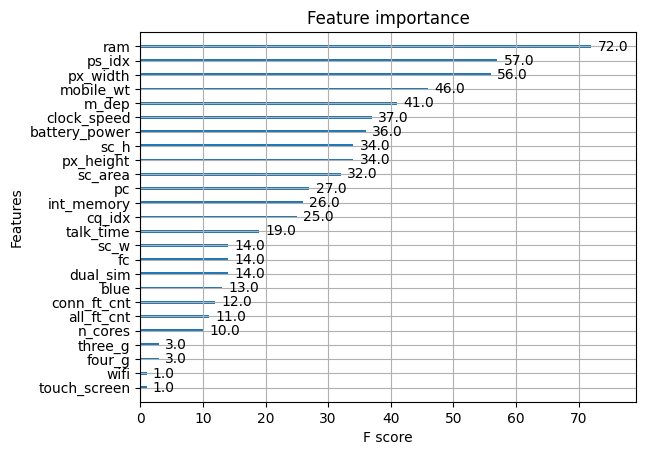

In [ ]:
# 特徴量の重要度の可視化
xgb.plot_importance(bst)

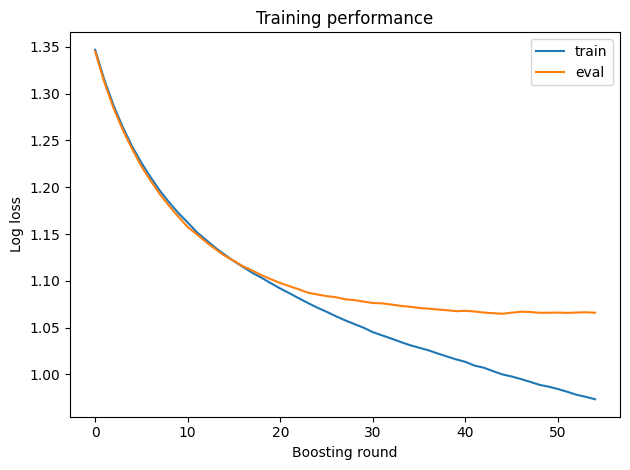

In [ ]:
# 学習過程の可視化
import matplotlib.pyplot as plt

plt.plot(eval_results['train']['mlogloss'], label='train')
plt.plot(eval_results['eval']['mlogloss'], label='eval')
plt.ylabel('Log loss')
plt.xlabel('Boosting round')
plt.title('Training performance')
plt.legend()
plt.tight_layout()
plt.show()

## ハイパーパラメータチューニング

In [ ]:
!pip install optuna

In [ ]:
import optuna
import xgboost as xgb

def objective(trial):
  # ハイパーパラメータの設定
  params = {
    'max_depth': trial.suggest_int('max_depth', 2, 6),
    'eta': trial.suggest_loguniform('eta', 0.01, 0.3),
    'gamma': trial.suggest_loguniform('gamma', 1, 9),
    'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
    'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
    'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
    'objective': 'multi:softmax',
    'num_class': 4,
    'eval_metric': 'mlogloss'
  }

  # 訓練データセットを xgboost 用に変換
  dtrain = xgb.DMatrix(X_train, label=y_train)

  # モデルの訓練
  bst = xgb.train(params, dtrain, num_boost_round=100)

  # 検証データセットを xgboost 用に変換
  dvalid = xgb.DMatrix(X_valid, label=y_valid)

  # 予測
  pred = bst.predict(dvalid)

  # f1 スコアの計算
  f1_macro = f1_score(y_valid, pred, average='macro')

  return f1_macro

# ハイパーパラメータチューニングの実行
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)


[I 2024-05-21 08:09:21,619] A new study created in memory with name: no-name-f0487f37-a146-4d79-aa03-3eb636fc1dc9
<ipython-input-96-09a40d6714d5>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'eta': trial.suggest_loguniform('eta', 0.01, 0.3),
<ipython-input-96-09a40d6714d5>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1, 9),
<ipython-input-96-09a40d6714d5>:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-

In [ ]:
# 最適なハイパーパラメータの取得
best_params = study.best_params

other_params = {'objective': 'multi:softmax',
    'num_class': 4,
    'eval_metric': 'mlogloss'}

best_params.update(other_params)

# 最適なハイパーパラメータでモデルを訓練
bst = xgb.train(best_params,
                dtrain=dtrain,
                num_boost_round=100)

# 検証データに対する正解率の表示
pred_valid = bst.predict(dvalid)
score = accuracy_score(y_valid, pred_valid)
print(f"Valid accuracy: {score:.4f}")

# f1 マクロスコアの計算
f1_macro = f1_score(y_valid, pred_valid, average='macro')
print(f"Valid f1 macro: {f1_macro:.4f}")


Valid accuracy: 0.5625
Valid f1 macro: 0.5355


In [ ]:
print(best_params)

{'max_depth': 2, 'eta': 0.29816995001241814, 'gamma': 2.471819242321174, 'subsample': 0.7929323977566762, 'colsample_bytree': 0.9278020657257912, 'min_child_weight': 9, 'objective': 'multi:softmax', 'num_class': 4, 'eval_metric': 'mlogloss'}


## モデルの評価： テストデータを用いた推論

In [ ]:
# テストデータを用いた推論
dtest = xgb.DMatrix(df_test)
pred_test = bst.predict(dtest)

pred_test = pred_test.astype(int)  # float => int
print(pred_test[:20])

[3 2 3 0 3 1 0 3 1 1 2 2 1 1 2 3 1 3 0 1]


In [ ]:
# test.csv の index(id) に合わせた submission ファイル作成

df_submission = pd.DataFrame({'id': df_test_id, 'price_range': pred_test})
df_submission.to_csv('submission.csv', index=False, header=None)


In [ ]:
# display(df_submission)

,id,price_range
0,1,2
1,2,2
2,6,0
3,10,2
4,12,2
...,...,...
795,1978,2
796,1980,2
797,1982,2
798,1988,2


In [ ]:
# sample_submission の index(id) に合わせた submission ファイル作成
# sample_submission.iloc[:, 1] = test_preds[1:]
# print(sample_submission)

# df_submission.to_csv('submission.csv', index=False, header=None)